procurement=közbeszerzés

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
plt.rcParams["font.size"]=15
%matplotlib inline

import goslate as gt
trans=gt.Goslate()

Reading the datafile.

In [2]:
df=pd.read_csv(
    "AllTenders.csv.gz",
    sep=",",
    skiprows=1,
    compression="gzip",
    low_memory=False,
    index_col=0)

In [3]:
from datetime import datetime

In [4]:
df[df.columns[4:7]]=df[df.columns[4:7]].apply(lambda row: [datetime.strptime(date,"%Y-%m-%d") for date in row], axis=1)

A glimpse into the datafile.

In [80]:
df.head(40).transpose().head(37)

id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
procurring_entity_id,1,2,3,3,5,5,5,4,2,4,...,22,21,20,19,18,17,41,30,29,28
tender_type,ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,...,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,ელექტრონული ტენდერი
tender_registration_number,SPA130012785,SPA130012786,SPA130012787,SPA130012788,SPA130012781,SPA130012782,SPA130012783,SPA130012784,SPA130012777,SPA130012778,...,SPA130012776,SPA130012761,SPA130012755,SPA130012750,SPA130012748,SPA130012749,SPA130012744,SPA130012775,SPA130012747,SPA130012745
tender_status,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ტენდერი არ შედგა,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,...,ხელშეკრულება დადებულია,ტენდერი არ შედგა,ტენდერი არ შედგა,ხელშეკრულება დადებულია,დასრულებულია უარყოფითი შედეგით,ტენდერი არ შედგა,ხელშეკრულება დადებულია,ტენდერი არ შედგა,დასრულებულია უარყოფითი შედეგით,ხელშეკრულება დადებულია
tender_announcement_date,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,...,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11,2013-06-11
bid_start_date,2013-06-28,2013-06-28,2013-06-13,2013-06-13,2013-06-12,2013-06-27,2013-06-12,2013-06-28,2013-06-12,2013-06-13,...,2013-06-13,2013-06-27,2013-06-27,2013-06-12,2013-06-12,2013-06-13,2013-06-13,2013-06-12,2013-06-27,2013-06-27
bid_end_date,2013-07-03,2013-07-03,2013-06-17,2013-06-17,2013-06-14,2013-07-02,2013-06-14,2013-07-03,2013-06-14,2013-06-17,...,2013-06-17,2013-07-02,2013-07-02,2013-06-14,2013-06-14,2013-06-17,2013-06-17,2013-06-14,2013-07-02,2013-07-02
estimated_value,22110,2870,4935,4947,2700,13120,1400,43573,1200,838,...,11600,40000,5000,3940,48000,1200,8800,7500,5300,10208
include_vat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpv_code_and_description,66500000 - სადაზღვევო და საპენსიო მომსახურებები,39200000 - ავეჯის აქსესუარები,22600000 - საღებავი,22500000 - საბეჭდი ფორმები ან ცილინდრები ან ბე...,79800000 - ბეჭდვა და მასთან დაკავშირებული მომს...,30200000 - კომპიუტერული მოწყობილობები და აქსეს...,50100000 - სატრანსპორტო საშუალებებისა და მათთა...,45400000 - შენობის დასრულების სამუშაოები,39200000 - ავეჯის აქსესუარები,"30100000 - საოფისე მანქანა-დანადგარები, აღჭურვ...",...,39700000 - საოჯახო ტექნიკა,18800000 - ფეხსაცმელი,73100000 - მომსახურებები კვლევისა და ექსპერიმე...,44200000 - სტრუქტურული მასალები,48900000 - სხვადასხვა სახის პროგრამული პაკეტებ...,"30100000 - საოფისე მანქანა-დანადგარები, აღჭურვ...",60100000 - საავტომობილო ტრანსპორტიs მომსახურებები,24300000 - ძირითადი არაორგანული და ორგანული ქი...,30200000 - კომპიუტერული მოწყობილობები და აქსეს...,45200000 - მთლიანი ან ნაწილობრივი სამშენებლო ს...


What are the column names? (There are 35 bidders, each of them has 4 columns: `name, id, lowest bid, black_or_white`.)

In [29]:
print "\n".join(df.columns[0:37])

procurring_entity_id
tender_type
tender_registration_number
tender_status
tender_announcement_date
bid_start_date
bid_end_date
estimated_value
include_vat
cpv_code_and_description
offer_step
guarantee_amount
guarantee_period
created_at
updated_at
dataset_id
url_id
num_bids
num_bidders
contract_value
currency
winning_org_id
risk_indicators
procurer_name
supplier_name
sub_codes
inProgress
updated
is_new
procurer_code
winner_code
number_of_amendments
bidder_0_name
bidder_0_id
bidder_0_lowest_bid
bidder_0_black_or_white
bidder_1_name


How many rows and columns are there in the dataframe?

In [24]:
df.shape

(138335, 176)

What are the unique tender types?

In [23]:
print "\n".join(df.tender_type.unique())

ელექტრონული ტენდერი
გამარტივებული ელექტრონული ტენდერი
კონსოლიდირებული ტენდერი
შესყიდვის ელექტრონული პროცედურა


In [64]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_type.unique()))

Electronic Tender
Simplified electronic tender
Consolidated Tender
Electronic procurement procedure


What are the unique tender statuses?

In [30]:
print "\n".join(df.tender_status.unique())

ხელშეკრულება დადებულია
ტენდერი არ შედგა
დასრულებულია უარყოფითი შედეგით
ტენდერი შეწყვეტილია
გამარჯვებული გამოვლენილია
წინადადებების მიღება დასრულებულია
მიმდინარეობს ხელშეკრულების მომზადება
შერჩევა/შეფასება
ტენდერი გამოცხადებულია
წინადადებების მიღება დაწყებულია


In [65]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_status.unique()))

Contract Awarded
No Bids
Contract
Tender canceled
Winner Identified
Bidding completed
Preparation of contract
Selection / Evaluation
Tender Announced
Bids started


How many procurements are there overall?

In [32]:
df.procurring_entity_id.unique().size

2386

[]

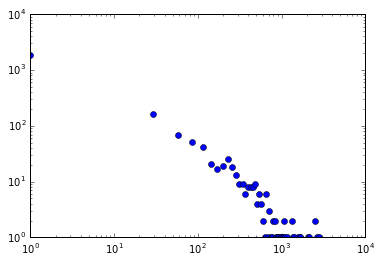

In [57]:
y,x=np.histogram(np.array(df.groupby("procurring_entity_id").size()),bins=100)
plt.plot(x[:-1],y,'o')
plt.loglog()

The procurements with the most tenders.

In [124]:
tender_size_list=df.groupby("procurring_entity_id").size()
tender_size_list.sort(ascending=False)

How tenders came in daily for this procurement.

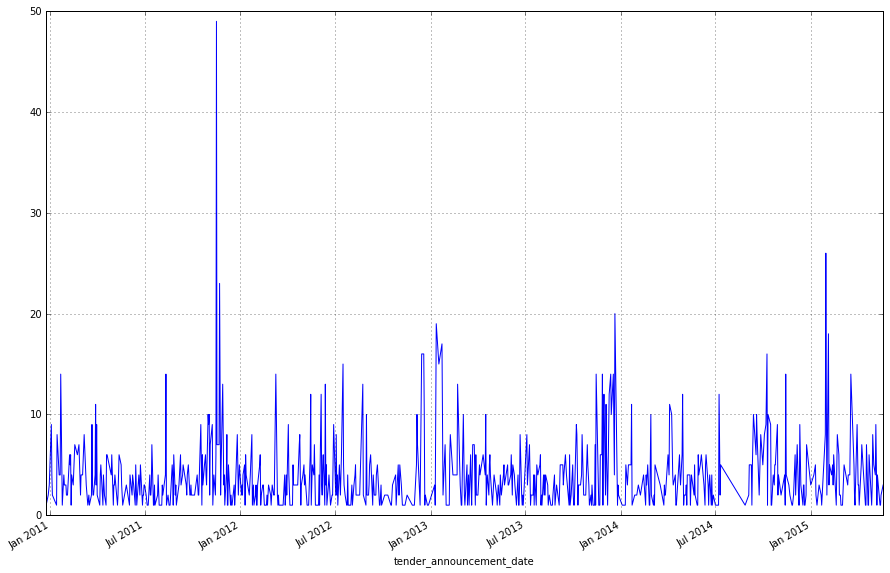

In [100]:
df[df.procurring_entity_id==tender_size_list.index[0]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Same for the second most tenders.

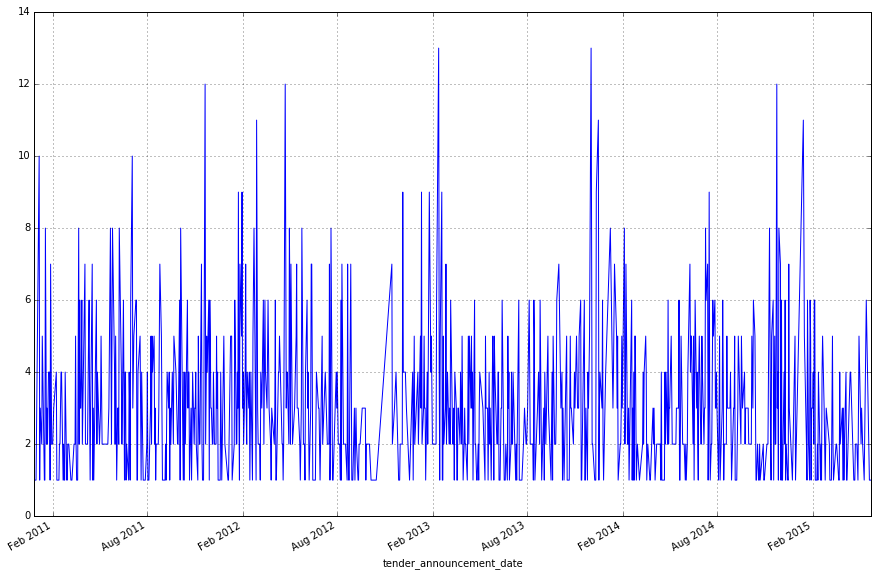

In [129]:
df[df.procurring_entity_id==tender_size_list.index[1]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Possible questions:
- How many days did the biddings last?
- What was the number of bidders?
- How did he price change during the bidding period?
- What was the deadline and when was the winner announced?
- Drawing a co-bidding network.
- Time period between first bid and announcement.

In [14]:
print "\n".join(df.currency[~pd.isnull(df.currency)].unique())

ლარი
აშშ
ევრო


In [15]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.currency[~pd.isnull(df.currency)].unique()))

HTTPError: HTTP Error 503: Service Unavailable